# **Capstone Project 2- Supervised ML-Regression**
# **(Yes Bank Stock Closing Price Prediction)**

> **Project Summary** - # A well-known bank in the Indian financial industry is Yes Bank. The Rana Kapoor fraud case has been in the headlines since 2018 as a result of it. Due to this, it was interesting to observe how it affected the company's stock prices and whether Time series models or other prediction models could properly reflect for such circumstances. Since the bank's foundation, this dataset has included closing, starting, highest, and lowest stock values for each month. Predicting the stock's monthly closing price is the main goal.



 **Contribution** - Individual




 **Git Hub Link** -https://github.com/ANMOLSACHDEVAS/Capstone-Project-2-Yes-Bank-Stock-Closing-Price-Prediction



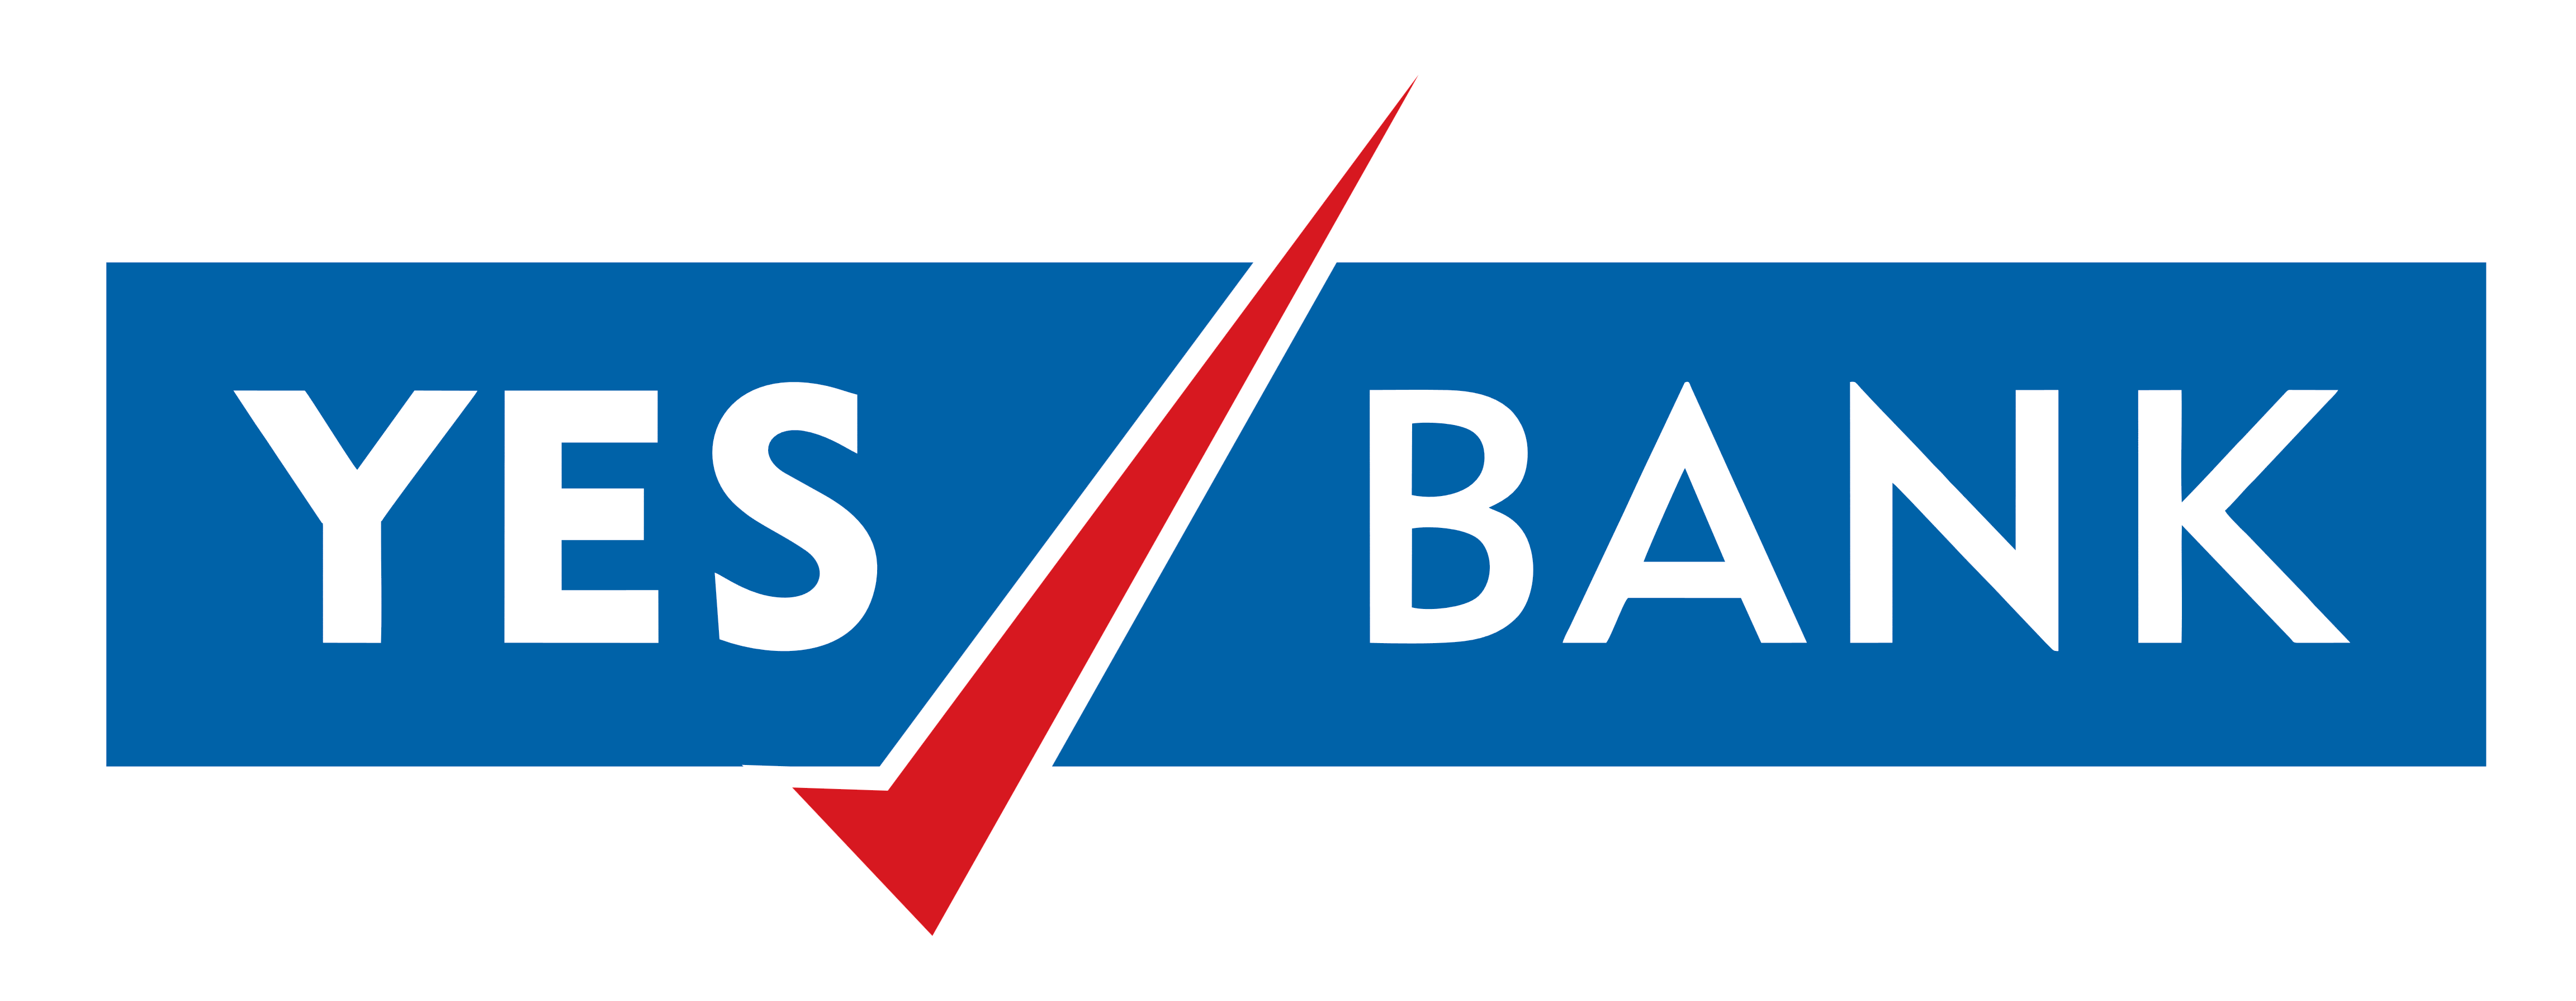

# **What is stock?**

###A financial instrument that reflects ownership in a corporation is a stock or share, commonly referred to as a company's "equity." "Shares" are the unit of measure for stock. The cornerstone of many individual investors' portfolios, stocks are often bought and sold on stock exchanges, though there can be private sales as well.

#**In order to implement your ideas and obtain insights from it, you must first understand your data.**

We clearly understood our issue and our goal, but there are still a few steps that must be taken in order to predict the closing price of the stock for the given month. These steps include performing Regression Analysis and Building a better model that can quickly and accurately predict our desired output.

So, to build a well performing model, we divided our effort into multiple parts in order to create a model that performs well:

**Feature Engineering**:- Introducing New Variables, Dummy Variables

**Univariate Analysis**:- Distplot, Histogram, Barplot

**Bivariate Analysis**:- Boxplot, Heatmap,

**Introduced Models**:- Linear Regression, Lasso, Ridge,ElasticNet, Decision tree, Random Forest    Regression

**We have 185 rows and 5 columns in our dataset. Here our dependent variables Close and Independent variables is Open,High and Low.**

**Date:-** It denotes the month and year or a specific pricing. 

**Open:-** The price at which a stock started trading that month is referred to as the "Open"

**High:-** The highest price for that particular month.

**Low:-** It describes the  monthly minimum price.

**Close:-** It refers to the Final trading price for that month , which we have to predict using regression.





# ***Let's Begin !***
# **IMPORT THE NECESSARY LIBRARIES**

In [ ]:
# Importing the libraries

import numpy as np              
import pandas as pd 
# visualize with plots            
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
# to convert to date
from datetime import datetime     

# This technique is used to divide the dataset into a training set and a test set when building the model.
from sklearn.model_selection import train_test_split
# split train and test data on a timeseries   
from sklearn.model_selection import (cross_val_score,TimeSeriesSplit)
 

#Import libraries for Regressor
import math
# scale the data
from sklearn.preprocessing import (MinMaxScaler,StandardScaler) 
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
# import required metrics
from sklearn import metrics
from sklearn.metrics import (r2_score)
from sklearn.metrics import (mean_squared_error)
from sklearn.metrics import (mean_absolute_percentage_error)
from sklearn.metrics import (mean_absolute_error)
# regularization
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import (RidgeCV)
from sklearn.linear_model import (LassoCV) 
from sklearn.linear_model import (ElasticNetCV)
from sklearn.model_selection import KFold


# Import the matrix module to evaluate the model's performance.
from sklearn.metrics import  *
import pandas.testing 

# Import the variance inflation factor technique to reduce multicollinearity in independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# do not disturb mode
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Almabetter/Capstone project/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'
data_df=pd.read_csv(file_path)

# Lets Explore "YES BANK STOCK CLOSING PRICE PREDICTION" Dataframe

In [ ]:
# fetching Top 5 rows from dataset using head() function
data_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#look for bottom rows
data_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Display the "yes bank" App data
yes_bank =pd.concat([data_df.head(),data_df.tail()])
yes_bank

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# number of rows and columns in the dataset
data_df.shape

(185, 5)

In [ ]:
# details of the features 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### **Gettting Statistical Information about our dataset**

In [ ]:
# brief summary of the dataset
data_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From above statistical information we can see that it is not a normal distribution as mean and 50% values are having alot of difference

# **DATA CLEANING**

**In data cleaning we will check for**:

* **Null values/NaN values**
* **Duplicates**
* **Outlier Detection**


In [ ]:
# Check if there are any duplicate rows.
len(data_df[data_df.duplicated()])

0

In [ ]:
#Check the columns present in dataset
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Check if there are any null values.
data_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

# **Outlier Detection**

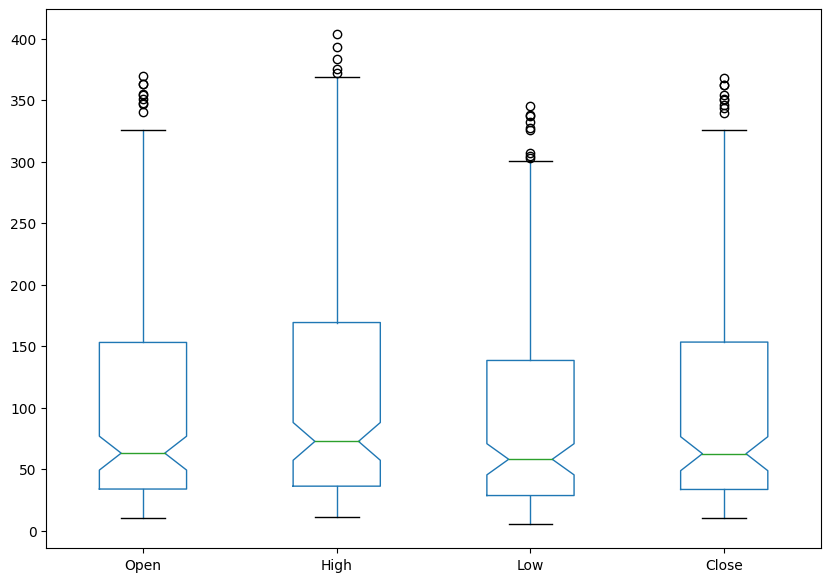

In [ ]:
fig = plt.figure(figsize =(10, 7))
boxplot = data_df.boxplot(column=['Open','High','Low',"Close"],grid=False,notch=True)
 
plt.show()

As above boxplot shows outliers this is because of stock price fall from nearly around 400 to 20.This happen quick within very few months thats why top value of stocks looks like outliers.

Conclusion:

1.There are no duplicates present

2.There are no null values present

3.Columns in dataset are Date,Open,High,Low,Close

4.Date column is of 'object' datatype we have to convert it to 'datetime'.







In [ ]:
# convert string object to datetime object
data_df['Date'] = data_df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
#Check the datatype of the columns after changing datatype of date
data_df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

**-----YES!!! datatype change into reqiured format**

In [ ]:
data_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
data_df.tail()

,Date,Open,High,Low,Close
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


In [ ]:
# Display the "yes bank" App data
yes_bank =pd.concat([data_df.head(),data_df.tail()])
yes_bank

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42
184,2020-11-01,12.41,14.90,12.21,14.67


*  Yes bank stock listed on month of july 2005.We have data available from july 2005 to november 2020

<Axes: title={'center': 'Yes Bank closing price'}, xlabel='Date', ylabel='Close Prices'>

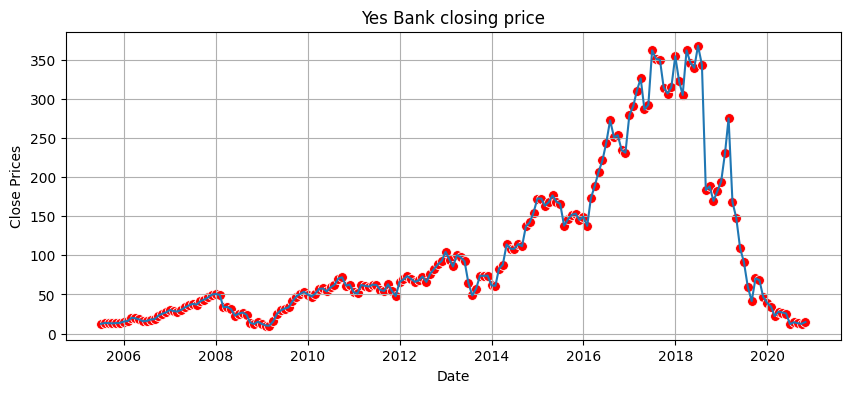

In [ ]:
# Yes Bank DEPENDENT Closing Price Plotting
plt.figure(figsize=(10,4))
plt.grid(True)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.plot(data_df['Date'],data_df['Close'])
plt.title('Yes Bank closing price')
sns.scatterplot(data=data_df, x="Date", y="Close", s=50, color="r")

**Insights From this chart-** From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

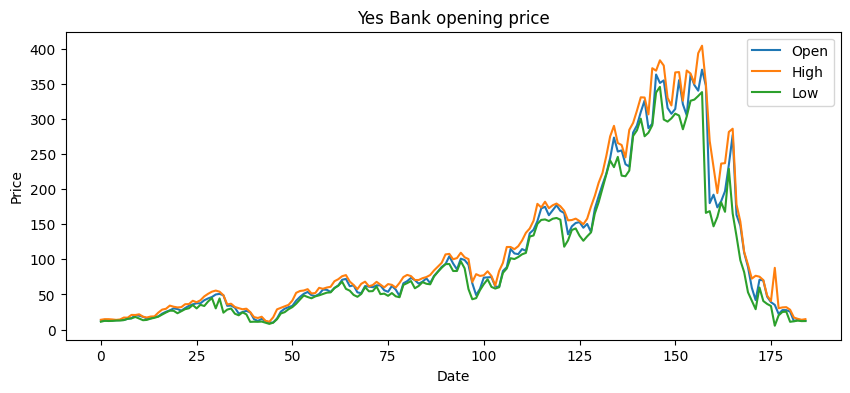

In [ ]:
# Yes Bank INDEPENDENT VARIABLES OPEN,HIGH,LOWPrice Plotting
plt.figure(figsize=(10,4))
plt.plot(data_df['Open'])
plt.plot(data_df['High'])
plt.plot(data_df['Low'])
plt.legend(['Open',"High",'Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank opening price')
plt.show()

* This chart gives us a clear uderstanding and visualization of our independent variables open,high and low price from July 2005 till November 2020.


* From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

* After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there wa a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.
the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

**Insights From this chart**- From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

# **Dependent variable of Close Price Stock**

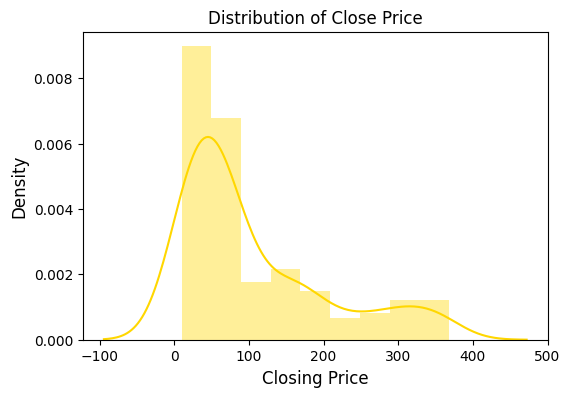

In [ ]:
# Depndent Variable is "Close"
plt.figure(figsize=(6, 4))
sns.distplot(data_df["Close"], color="gold")
plt.title('Distribution of Close Price')
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is rightly skewed distribution

We need to Apply log transformation to make normal distribution.

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

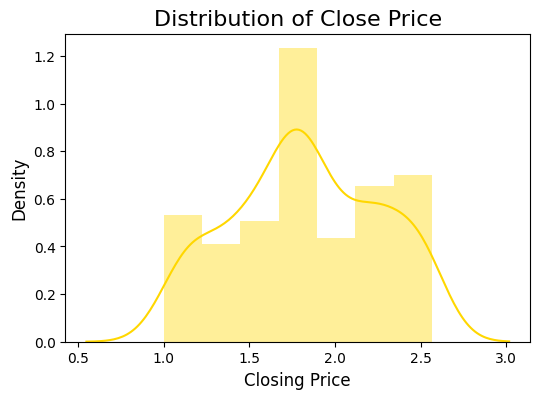

In [ ]:
# Depndent Variable is "Close" with Normal Distribution
plt.figure(figsize=(6,4))
sns.distplot(np.log10(data_df['Close']),color='gold')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

After using log transormations as it was positively skewed.

Now it seems more normal.


# **Independent Variable Open , High and Low price of stock**

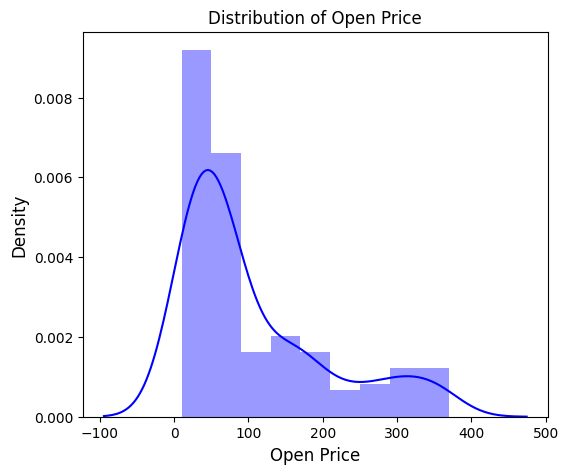

In [ ]:
# Inepndent Variable is "Open"
plt.figure(figsize=(6, 5))
sns.distplot(data_df["Open"], color="Blue")
plt.title('Distribution of Open Price')
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is rightly skewed distribution

We need to Apply log transformation to make normal distribution.


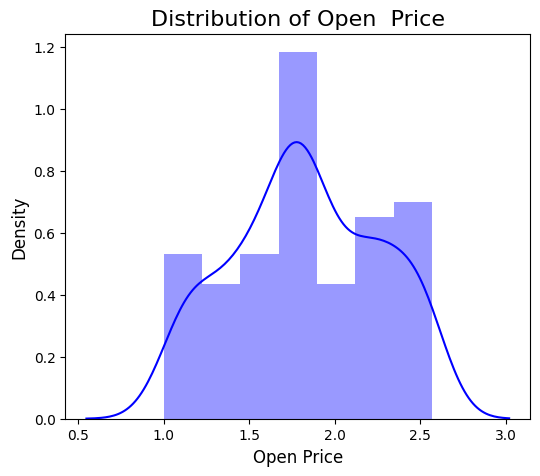

In [ ]:
# Inepndent Variable is "Open" with Normal Distribution
plt.figure(figsize=(6, 5))
sns.distplot(np.log10(data_df['Open']),color='blue')
plt.title('Distribution of Open  Price', fontsize=16)
plt.xlabel('Open Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

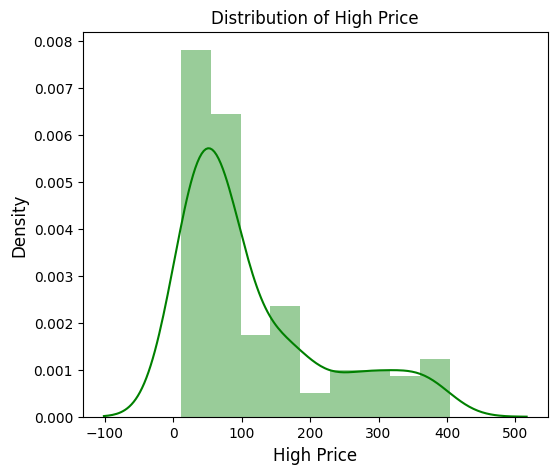

In [ ]:
# Inepndent Variable is "High"
plt.figure(figsize=(6, 5))
sns.distplot(data_df["High"], color="green")
plt.title('Distribution of High Price')
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


It is rightly skewed distribution

We need to Apply log transformation to make normal distribution.

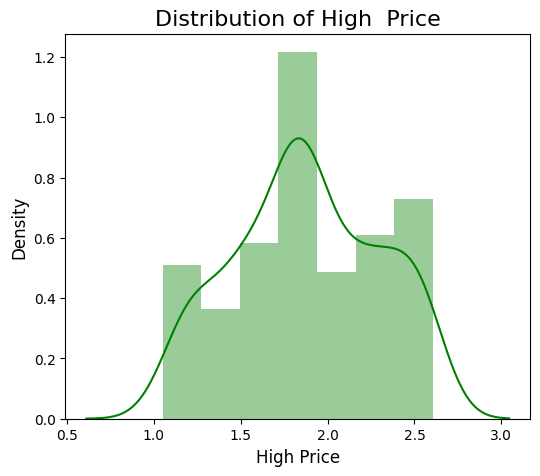

In [ ]:
# Inepndent Variable is "High" with Normal Distribution
plt.figure(figsize=(6, 5))
sns.distplot(np.log10(data_df['High']),color='green')
plt.title('Distribution of High  Price', fontsize=16)
plt.xlabel('High Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

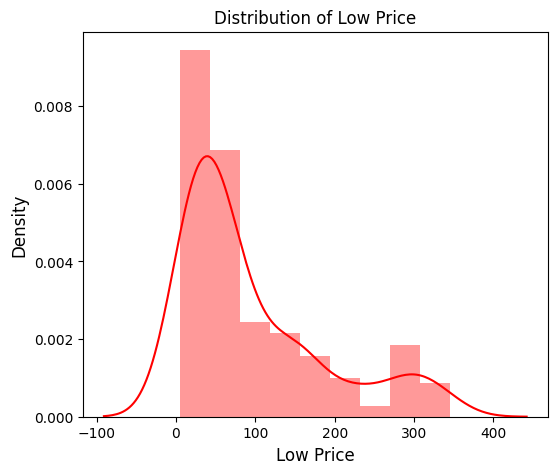

In [ ]:
# Inepndent Variable is "Low"
plt.figure(figsize=(6, 5))
sns.distplot(data_df["Low"], color="red")
plt.title('Distribution of Low Price')
plt.xlabel('Low Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is rightly skewed distribution

We need to Apply log transformation to make normal distribution.

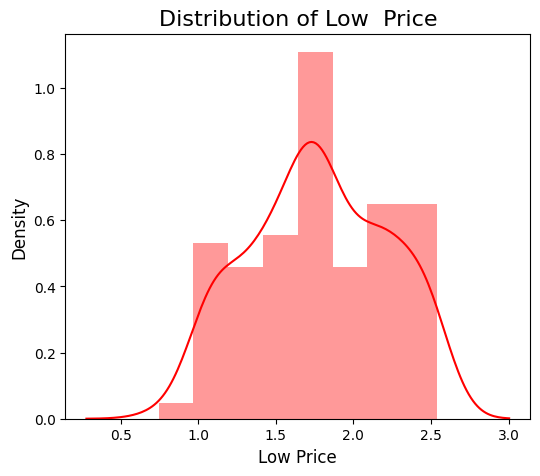

In [ ]:
# Inepndent Variable is "Low" with Normal Distribution
plt.figure(figsize=(6, 5))
sns.distplot(np.log10(data_df['Low']),color='red')
plt.title('Distribution of Low  Price', fontsize=16)
plt.xlabel('Low Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

#**Now, find out the relation between the Dependent Variable and Independent Variable**

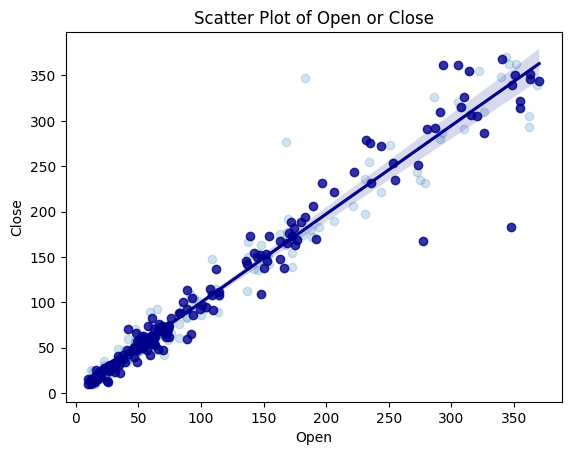

In [ ]:
# By using scatter plot, we can find out the relation b/w the Dependent Variable and Independent Variable
# Scatter Plot of 'Close or Open'
plt.scatter(data_df['Close'],data_df['Open'], alpha=0.2)
plt.title('Scatter Plot of Open or Close')
sns.regplot( data= data_df, x ='Open', y ='Close', color="DarkBlue")
plt.show()

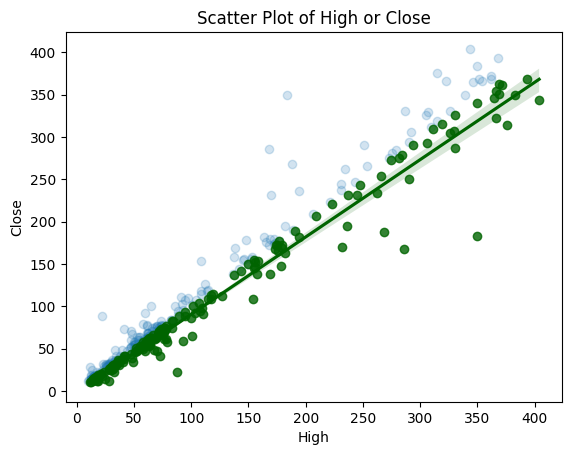

In [ ]:
# Scatter Plot Close or High
plt.scatter(data_df['Close'],data_df['High'], alpha=0.2)
plt.title('Scatter Plot of High or Close')
sns.regplot( data= data_df, x ='High', y ='Close', color="Darkgreen")
plt.show()

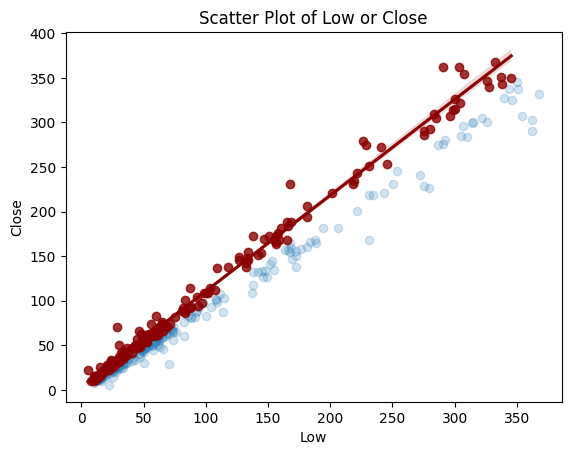

In [ ]:
# Scatter Plot Close or Low
plt.scatter(data_df['Close'],data_df['Low'], alpha=0.2)
plt.title('Scatter Plot of Low or Close')
sns.regplot(data= data_df, x ='Low', y ='Close', color="DarkRed")
plt.show()

# **Correlation between variables**

<Axes: >

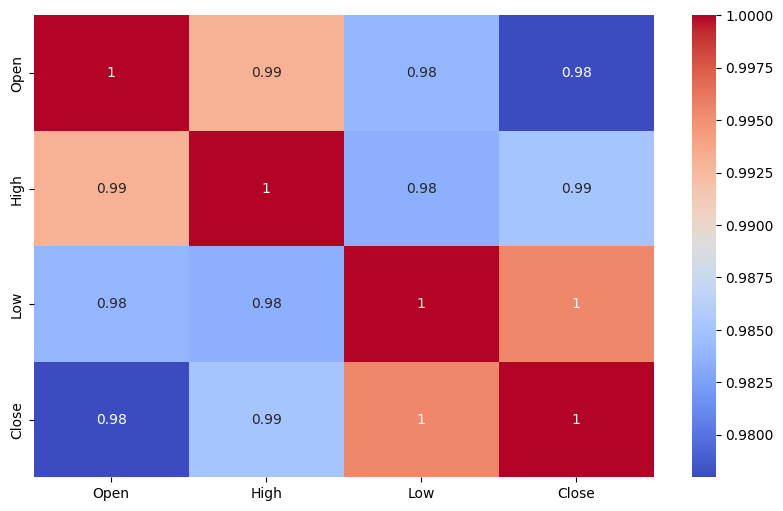

In [ ]:
# Check the correlation with the Heatmap.

plt.figure(figsize=(10,6))
correlation = data_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

**Correlation in statistics is the measure of the degree to which two variables move in relationship to each other. An example of correlation is the idea that “As the temperature goes up, ice cream sales also go up.” It is important to remember that correlation doesn’t mean that one event causes another. But, it does indicate that they have a pattern with or a relationship to each other. If one variable goes up and the other variable also goes up, it is a positive correlation. If one variable goes up and the other variable goes down, it is a negative or inverse correlation. If one variable goes up and the other variable stays about the same, there is no correlation.**

* There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

* To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

* so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.



# **Multicollinearity**



Calculate the variation inflation factor (VIF:- The Variance Inflation Factor (VIF) measures the severity of multicollinearity in regression analysis. It is a statistical concept that indicates the increase in the variance of a regression coefficient as a result of collinearity.)

 To determine the correlation between independent 
variables.

In [ ]:
def Calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calc_vif(data_df[[i for i in data_df.describe().columns if i not in ["Date", "Close"]]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137




* In general case, Any variable having VIF above 5 is considered to be multicollinear.

* Even though we have strong VIF ratings, we won't do feature engineering because each feature is critical for this specific use case. Most indicators in the real world consider each of these characteristics to predict future values.

* The thumb rule is to drop the highest VIF variable.

* Due to the fact that each column is equally crucial for prediction, we are not deleting any columns.

* Column removal resulted in the loss of important data (features) that are necessary for the model to make correct predictions. It produces a poor model.

* Therefore, we are not removing any features from the dataset while we attempt to predict the outcome, assess the model's performance with respect to multicollinearity, and make adjustments as necessary.

* Here all feature are equally important and we have very limited features.


* However, you may choose to select the variable to be dropped based on business logic

# **Data transformation**

**Splitting data**

*  X = Independent variable
*  Y = Dependent variable

#**Train & Test DataSets**
* The dataset must be split into two groups.
* The training dataset is the first subset, which is used to fit the model.
* The model is not trained using the second subset. Instead, the model is given the dataset's input element before making predictions and comparing them to the predicted values. This second dataset is referred to as the test dataset.
* Test Dataset: Used to evaluate how well a machine learning model fits the data.

In [ ]:
# Split the datasets
X = data_df.drop(columns=['Close','Date'])
y = data_df['Close']

# **Normalization**

Data must be normally distributed before apply normalization..
Normalization is one of the feature scaling techniques. We particularly apply normalization when the data is skewed on the either axis i.e. when the data does not follow the gaussian distribution.In normalization, we convert the data features of different scales to a common scale which further makes it easy for the data to be processed for modeling. Thus, all the data features(variables) tend to have a similar impact on the modeling portion.

In [ ]:
# Data transforma:
from scipy.stats import zscore
x = X.apply(zscore)
y = np.log10(y)

**Splitting train test data with 80-20**

In [ ]:
# Split our data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20,random_state= 1)

In [ ]:
# Shape of the Training dataset
print(x_train.shape)

(148, 3)


In [ ]:
# Shape of the Test dataset
print(x_test.shape)

(37, 3)


In [ ]:
# Train data 
y_train.head()

59     1.731024
73     1.745153
120    2.219427
145    2.545493
118    2.246794
Name: Close, dtype: float64

In [ ]:
# Transform the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **We Create 6 Regression Models for our Data.**

1} **Linear Regression**

2} **Lasso Regression**

3} **Ridge Regression**

4} **Elastic Net Regression**

5} **Decision Tree Regression**

6} **Random Forest Regressor**

# 1} **Implementing Linear Regression**

Linear regression is the most basic machine learning approach that can be applied to this data.The result of the linear regression model is an equation showing how the independent variables and dependent variable related to each other.

In [ ]:
#Importing Libraries
Lin_reg= LinearRegression()
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
round(Lin_reg.score(x_train,y_train), 4)

0.8147

In [ ]:
round(Lin_reg.score(x_test, y_test), 4)

0.8226

In [ ]:
Prediction=Lin_reg.predict(x_test)
Prediction

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Creating the DataFrames of test & train Dataset
train_Dataframe = pd.DataFrame(x_train,y_train)
test_Dataframe = pd.DataFrame(10**y_test)
test_Dataframe.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [ ]:
test_Dataframe['Predicted Closing Price']=10**Prediction
test_Dataframe.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


In [ ]:
Prediction[0:5]

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458])

# **Time to know about metrics**

1.   Mean Squared Error (MSE):- The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.
2.   Mean Absolute Error (MAE):-
This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.
3. R-squared or Coefficient of Determination:-
This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.
4. Root Mean Squared Error (RMSE):-
This is the square root of the average of the squared difference of the predicted and actual value.R-squared error is better than RMSE. This is because R-squared is a relative measure while RMSE is an absolute measure of fit 
5. Adjusted R-squared — selection criterion:-
The main difference between adjusted R-squared and R-square is that R-squared describes the amount of variance of the dependent variable represented by every single independent variable, while adjusted R-squared measures variation explained by only the independent variables that actually affect the dependent variable.
6. Mean Absolute Percentage Error (MAPE):-
The mean absolute percentage error (MAPE) is the percentage equivalent of MAE. The equation looks just like that of MAE, but with adjustments to convert everything into percentages.

**Evaluation Metrics of Linear Regression:**

In [ ]:
#Testing Performence of Linear Regression Model
print('Performance of Linear Regression Model')
print("MSE :",round(mean_squared_error(y_test, Prediction),4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, Prediction)),4))
print("MAE :",round(mean_absolute_error(y_test, Prediction),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, Prediction),4))
print("R2 :",round(r2_score(y_test, Prediction),4))

Performance of Linear Regression Model
MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
R2 : 0.8226


Lets know actual and model predicted curve

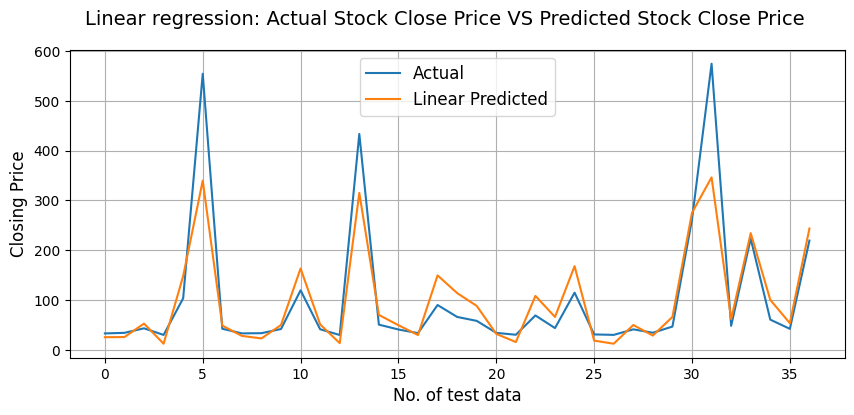

In [ ]:
# Actual Price vs Prediction price for Linear Regression plot:
plt.figure(figsize=(10,4))
plt.plot(10**(Prediction))             
plt.plot(10**(np.array(y_test)))           
plt.xlabel("No. of test data",fontsize= 12)
plt.ylabel("Closing Price",fontsize= 12)
plt.suptitle("Linear regression: Actual Stock Close Price VS Predicted Stock Close Price",fontsize=14)
plt.legend(["Actual","Linear Predicted"],fontsize= 12)
plt.grid(True)
plt.show()

There is much value difference seen spikes of price

# **Regularization Technique**

# 2} **Implementing Lasso Regression**

Lasso(least absolute shrinkage and selection operator) regression is another technique of Parameter estimation regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization enhances the accessibility of models.

In [ ]:
#fit data into Lasso Regression
#Importing Libraries
Lasso_reg = Lasso(alpha=0.001, max_iter=3000)  #will keep alpha=0.1 and max iteration upto 3000
Lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# Checking Accuracy Score of Lasso Regression Model
round(Lasso_reg.score(x_train,y_train),4)

0.8144

In [ ]:
# Lasso Regression Predicted train Data Value:
pred_Lasso = Lasso_reg.predict(x_test)
pred_Lasso

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Adding a column to the test dataset will allow to compare the Actual and Predicted values.

test_Dataframe['Lasso Predicted Closing Price'] = 10**pred_Lasso
lasso_dataframe = test_Dataframe.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_dataframe.head(5)

,Actual Closing Price,Lasso Predicted Closing Price
16,25.32,33.073882
179,25.60,34.256798
66,52.59,43.659945
40,12.26,30.121110
166,147.95,103.585017


In [ ]:
#Testing Performence of Lasso Regression Model
print('Performance of Lasso Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Lasso),4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Lasso),4))
print("R2 :",round(r2_score(y_test, pred_Lasso),4))

Performance of Lasso Regression Model
MSE : 0.032
RMSE : 0.1789
MAE : 0.1522
MAPE : 0.0961
R2 : 0.8202


Lets know actual and model predicted curve

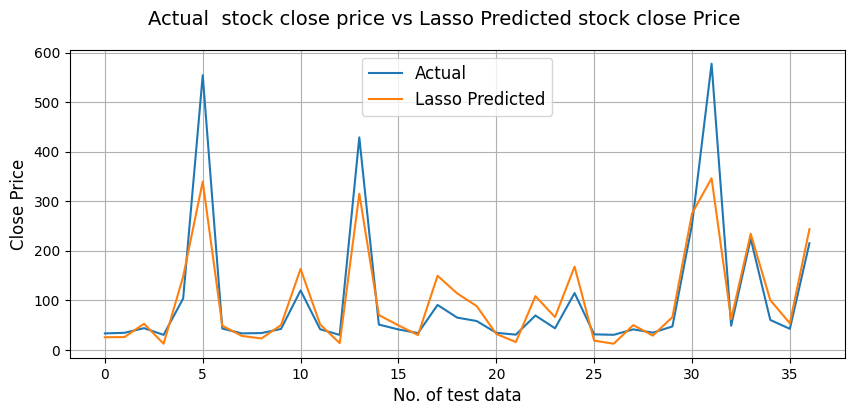

In [ ]:
# Actual Price vs Prediction price for lasso Regression plot:
plt.figure(figsize=(10,4))
plt.plot(10**(pred_Lasso))
plt.plot(10**(np.array(y_test)))
plt.xlabel("No. of test data",fontsize= 12)
plt.ylabel("Close Price",fontsize= 12)
plt.suptitle("Actual  stock close price vs Lasso Predicted stock close Price",fontsize=14)
plt.legend(["Actual","Lasso Predicted"],fontsize= 12)
plt.grid(True)
plt.show()

As we see spike get accurately predicted in lasso but flat prices predication varies much

# **Cross Validation on Lasso Regression**

# We must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows : 
1.   Reserve some portion of sample data-set.
2.   Using the rest data-set train the model.
3.   Test the model using the reserve portion of the data-set.#

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)

In [ ]:
lasso_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0369


In [ ]:
#prediction of test data.
pred_Lasso_CV = lasso_model_cv.predict(x_test)
pred_Lasso_CV

array([1.54694602, 1.56066183, 1.65728043, 1.51008232, 2.00195242,
       2.65813204, 1.65140342, 1.54777141, 1.55516939, 1.64213204,
       2.0559078 , 1.63542222, 1.50734379, 2.55650027, 1.71634387,
       1.6325109 , 1.5541834 , 1.94537999, 1.8161572 , 1.76893099,
       1.5610699 , 1.5153393 , 1.83846895, 1.65521677, 2.03719097,
       1.52293206, 1.511376  , 1.63376672, 1.56418108, 1.68718914,
       2.35369383, 2.67678397, 1.69997363, 2.30558   , 1.78471567,
       1.64359171, 2.28623195])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_Dataframe['lasso Predicted Closing Price'] = 10**pred_Lasso_CV
lasso_df = test_Dataframe.loc[:,['Actual Closing Price','lasso Predicted Closing Price']]
lasso_df.head(5)

,Actual Closing Price,lasso Predicted Closing Price
16,25.32,35.232708
179,25.60,36.363178
66,52.59,45.423482
40,12.26,32.365500
166,147.95,100.450574


**Evaluation Metrics of Lasso Regression after Validation:**

In [ ]:
#Testing Performence of Lasso Regression Model ater cross validation
print('Performance of Lasso Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Lasso_CV), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Lasso_CV)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Lasso_CV),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Lasso_CV),4))
print("R2 :",round(r2_score(y_test, pred_Lasso_CV), 4))

Performance of Lasso Regression Model
MSE : 0.034
RMSE : 0.1843
MAE : 0.1551
MAPE : 0.1
R2 : 0.8091


After validation accuracy decrease

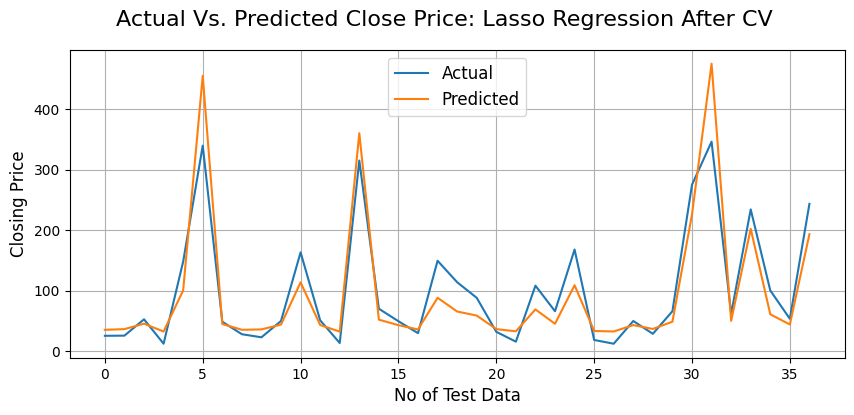

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,4))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(pred_Lasso_CV))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# 3} **Implementation of Ridge Regression**

Ridge regression is a model-tuning technique that is used to analyse any multicollinear data. L2 regularisation is done using this technique. The projected values vary significantly from the actual values when the problem of multicollinearity is present, least-squares are unbiased, and variances are large.

In [ ]:
#Importing Libraries
Ridge_reg = Ridge(alpha= 0.1)
Ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#Accuracy of lasso regression model 
round(Ridge_reg.score(x_train, y_train), 4)

0.8141

In [ ]:
#Prediction of test data
pred_Ridge= Ridge_reg.predict(x_test)
pred_Ridge


array([1.51681675, 1.53255024, 1.64135134, 1.47687218, 2.01963705,
       2.75155235, 1.63473225, 1.51693004, 1.52773879, 1.62318793,
       2.08158597, 1.61542024, 1.47455115, 2.63508426, 1.70593368,
       1.61278434, 1.52495118, 1.95973505, 1.80785023, 1.76121244,
       1.53334058, 1.48368101, 1.84037593, 1.6326748 , 2.05955474,
       1.49175569, 1.47829991, 1.6125058 , 1.53709372, 1.67458833,
       2.39845583, 2.77299789, 1.68838401, 2.35904715, 1.77719596,
       1.62440651, 2.33055613])

In [ ]:
test_Dataframe['Ridge Predicted Closing Price'] = 10**pred_Ridge
ridge_df = test_Dataframe.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,32.871290
179,25.60,34.083975
66,52.59,43.787620
40,12.26,29.982800
166,147.95,104.625380


In [ ]:
# Tesingt performance of Ridge Regression Model
print('Performance of Ridge Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Ridge), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Ridge)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Ridge),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Ridge),4))
print("R2 :",round(r2_score(y_test, pred_Ridge), 4))

Performance of Ridge Regression Model
MSE : 0.0321
RMSE : 0.1791
MAE : 0.1522
MAPE : 0.0959
R2 : 0.8197


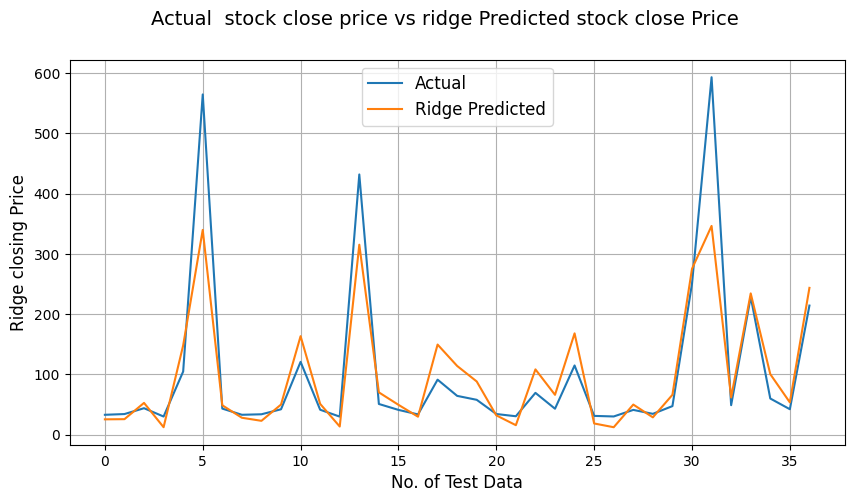

In [ ]:
# Plotting the Graph
plt.figure(figsize=(10,5))
plt.plot(10**(pred_Ridge))
plt.plot(10**(np.array(y_test)))
plt.xlabel('No. of Test Data', fontsize = 12)
plt.ylabel('Ridge closing Price', fontsize= 12)
plt.suptitle('Actual  stock close price vs ridge Predicted stock close Price', fontsize= 14)
plt.legend(["Actual","Ridge Predicted"],fontsize= 12)
plt.grid(True)
plt.show()

# **Cross Validation on Ridge Regression**

In [ ]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
ridge_model_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 1
The negative mean squared error for is:  -0.035


In [ ]:
#prediction of test data.
pred_Ridge_CV = ridge_model_cv.predict(x_test)
pred_Ridge_CV

array([1.52363934, 1.53950359, 1.65147831, 1.48676803, 2.02341628,
       2.7257897 , 1.65011276, 1.52368738, 1.53901778, 1.62976844,
       2.07741879, 1.61843866, 1.48318818, 2.60390027, 1.70828562,
       1.61948309, 1.53219564, 1.96060489, 1.80076803, 1.75906672,
       1.54190217, 1.49450483, 1.83932752, 1.63349981, 2.05019403,
       1.50013616, 1.48828434, 1.61559809, 1.54485816, 1.68242956,
       2.36963964, 2.75593021, 1.69685984, 2.35505327, 1.77352279,
       1.62810209, 2.30469895])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_Dataframe['Ridge Predicted Closing Price'] = 10**pred_Ridge_CV
ridge_df = test_Dataframe.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.391762
179,25.60,34.634075
66,52.59,44.820666
40,12.26,30.673831
166,147.95,105.539804


**Evaluation Metrics of Ridge Regression after Validation:-**

In [ ]:
# Tesingt performance of Ridge Regression Model ater cross validation
print('Performance of Ridge Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Ridge_CV), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Ridge_CV)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Ridge_CV),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Ridge_CV),4))
print("R2 :",round(r2_score(y_test, pred_Ridge_CV), 4))

Performance of Ridge Regression Model
MSE : 0.0327
RMSE : 0.1808
MAE : 0.1534
MAPE : 0.0971
R2 : 0.8164


After validation accuracy decrease

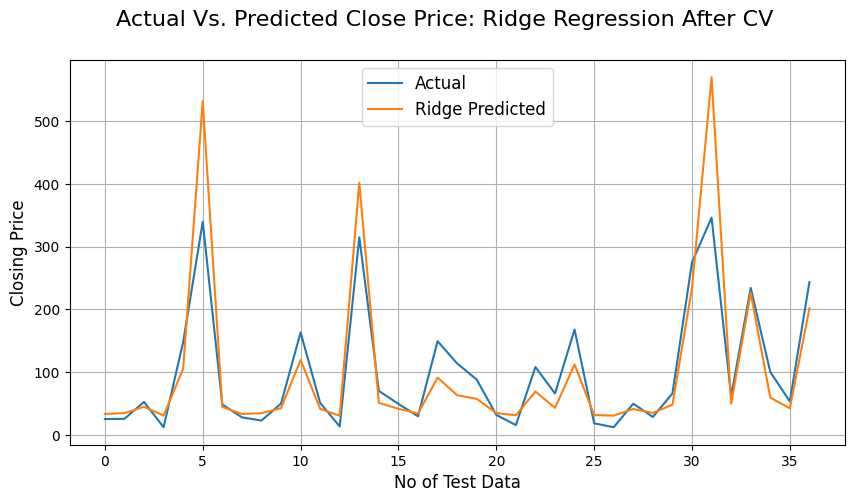

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(pred_Ridge_CV))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Ridge Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# 4} **Implementing Elastic net Regression**

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

In [ ]:
#fit data into Elastic Net
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
Elasticnet= ElasticNet(alpha=0.1, l1_ratio=0.5)
Elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#Accuracy of elastic net regression model
round(Elasticnet.score(x_train, y_train),4)

0.5418

In [ ]:
#Prediction of test data
pred_Elasticnet = Elasticnet.predict(x_test)
pred_Elasticnet


array([1.69933765, 1.7062825 , 1.75608348, 1.68353768, 1.91958656,
       2.22292125, 1.75656251, 1.69947378, 1.70674092, 1.74600026,
       1.94147187, 1.74032946, 1.68158796, 2.16862517, 1.77972588,
       1.74144215, 1.70318233, 1.89082076, 1.82003286, 1.80171222,
       1.70761334, 1.6869842 , 1.83703175, 1.74728261, 1.92860623,
       1.68902933, 1.684226  , 1.73926306, 1.70870793, 1.76926962,
       2.0675843 , 2.23786602, 1.77582837, 2.06395188, 1.8080259 ,
       1.74474363, 2.0384172 ])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_Dataframe['Elastic net Predicted Closing Price'] = 10**pred_Elasticnet
elasticnet_df = test_Dataframe.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elasticnet_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,50.042345
179,25.60,50.849010
66,52.59,57.027388
40,12.26,48.254485
166,147.95,83.097232


In [ ]:
# Tesingt performance of ElasticNET Regression Model
print('Performance of ElasticNET Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Elasticnet), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Elasticnet)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Elasticnet),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Elasticnet),4))
print("R2 :",round(r2_score(y_test, pred_Elasticnet), 4))

Performance of ElasticNET Regression Model
MSE : 0.0835
RMSE : 0.289
MAE : 0.2399
MAPE : 0.1519
R2 : 0.5309


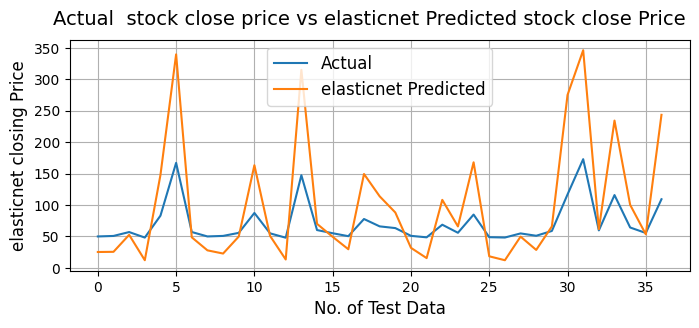

In [ ]:
# Plotting the Graph
plt.figure(figsize=(8,3))
plt.plot(10**(pred_Elasticnet))
plt.plot(10**(np.array(y_test)))
plt.xlabel('No. of Test Data', fontsize = 12)
plt.ylabel('elasticnet closing Price', fontsize= 12)
plt.suptitle('Actual  stock close price vs elasticnet Predicted stock close Price', fontsize= 14)
plt.legend(["Actual","elasticnet Predicted"],fontsize= 12)
plt.grid(True)
plt.show()

# **Cross Validation on Elastic Net**

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
elastic_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 0.3}

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 0.3
The negative mean squared error for is:  -0.036


In [ ]:
#prediction of test and train data.
pred_Elasticnet_CV = elastic_model_cv.predict(x_test)
pred_Elasticnet_CV

array([1.53293219, 1.548322  , 1.65707913, 1.49720593, 2.01807839,
       2.69889696, 1.65592158, 1.53300055, 1.54794841, 1.6359319 ,
       2.07019224, 1.62483053, 1.49366979, 2.58050632, 1.71201116,
       1.62594259, 1.5412488 , 1.95692486, 1.8017577 , 1.76125876,
       1.55069111, 1.50471706, 1.83915069, 1.63952235, 2.04363667,
       1.51011747, 1.49868097, 1.62210716, 1.55352679, 1.68705309,
       2.35350516, 2.72840846, 1.70109344, 2.33971132, 1.77528996,
       1.63423537, 2.29034805])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
test_Dataframe['Elastic net Predicted Closing Price'] = 10**pred_Elasticnet_CV
elasticnet_df = test_Dataframe.loc[:,['Actual Closing Price','Elastic net Predicted Closing Price']]
elasticnet_df.head(5)

,Actual Closing Price,Elastic net Predicted Closing Price
16,25.32,34.113964
179,25.60,35.344513
66,52.59,45.402434
40,12.26,31.419982
166,147.95,104.250558


**Evaluation Metrics of Elastic Net after Validation:**

In [ ]:
# Tesingt performance of ElasticNet Model ater cross validation
print('Performance of ElasticNet Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Elasticnet_CV), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Elasticnet_CV)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Elasticnet_CV),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Elasticnet_CV),4))
print("R2 :",round(r2_score(y_test, pred_Elasticnet_CV), 4))

Performance of ElasticNet Regression Model
MSE : 0.0333
RMSE : 0.1825
MAE : 0.1544
MAPE : 0.0985
R2 : 0.8129


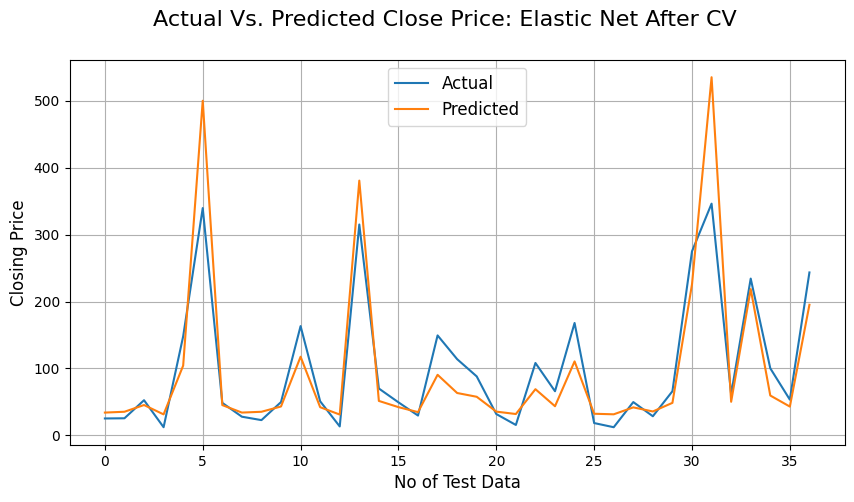

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(pred_Elasticnet_CV))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# 5} **Implementing Decision Tree Regression**

Decision tree regression trains a model in the form of a tree to predict data in the future and generate useful continuous output by observing the properties of an item.

In [ ]:
import sklearn
#Importing Libraries
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
#Accuracy of decision tree model 
round(dec_tree.score(x_train, y_train),4)

1.0

In [ ]:
#Prediction
pred_dec_tree=dec_tree.predict(x_test)
pred_dec_tree

array([1.35755372, 1.48158594, 1.73631681, 1.11892575, 2.23782011,
       2.54406804, 1.6716356 , 1.40568779, 1.48158594, 1.7100327 ,
       2.21942733, 1.67495295, 1.09551804, 2.48685536, 1.85648721,
       1.70389295, 1.43088095, 2.16205634, 1.96773513, 1.94684511,
       1.48158594, 1.18554215, 2.03494915, 1.7100327 , 2.23691496,
       1.30276371, 1.11892575, 1.7100327 , 1.47943134, 1.78682238,
       2.44575984, 2.54549267, 1.88332068, 2.36410052, 1.9330315 ,
       1.75663611, 2.36410052])

In [ ]:
test_Dataframe['Decision tree Predicted Closing Price'] = 10**pred_dec_tree
elastic_df = test_Dataframe.loc[:,['Actual Closing Price','Decision tree Predicted Closing Price']]
elastic_df.head(5)

,Actual Closing Price,Decision tree Predicted Closing Price
16,25.32,22.78
179,25.60,30.31
66,52.59,54.49
40,12.26,13.15
166,147.95,172.91


In [ ]:
# Tesingt performance of Decision Tree Regression Model
print('Performance of Decision tree Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_dec_tree), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_dec_tree)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_dec_tree),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_dec_tree),4))
print("R2 :",round(r2_score(y_test, pred_dec_tree), 4))

Performance of Decision tree Regression Model
MSE : 0.002
RMSE : 0.0448
MAE : 0.0326
MAPE : 0.0201
R2 : 0.9887


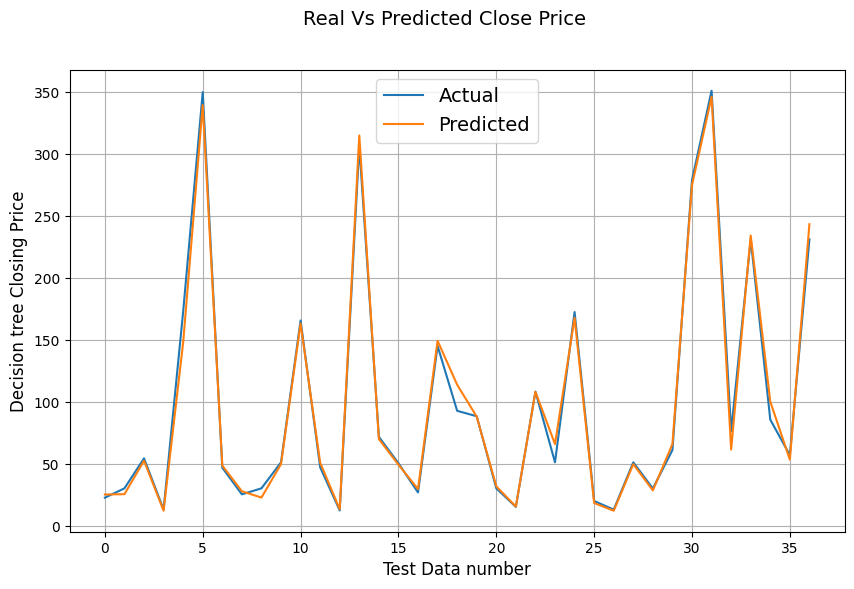

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(10**(pred_dec_tree))
plt.plot(10**(np.array(y_test)))
plt.xlabel('Test Data number', fontsize= 12)
plt.ylabel('Decision tree Closing Price', fontsize= 12)
plt.suptitle('Real Vs Predicted Close Price', fontsize = 14)
plt.legend(['Actual','Predicted'], fontsize = 14)
plt.grid(True)
plt.show()

# **6} Implementing Random Forest Regressor**

In [ ]:
#import libraries
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
#Defining the hypertuning parameters
n_estimators=[3,10]
max_depth=[5,10,15]
max_leaf_nodes=[20,15,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)
rf_grid.fit(x_train, y_train)

rf_grid.best_score_ , rf_grid.best_params_

(0.9857874773193659,
 {'max_depth': 15, 'max_leaf_nodes': 30, 'n_estimators': 3})

In [ ]:
pred_Randomforest=rf_grid.predict(x_test)
pred_Randomforest


array([1.4144472 , 1.4810832 , 1.76326269, 1.1162115 , 2.18892195,
       2.54996215, 1.74710133, 1.4144472 , 1.49118138, 1.73300991,
       2.24202967, 1.68531241, 1.10847193, 2.47753097, 1.86945826,
       1.73300991, 1.4144472 , 2.16290967, 2.00273494, 1.91627414,
       1.47893333, 1.20247961, 2.00484218, 1.74710133, 2.24202967,
       1.29094474, 1.1162115 , 1.73300991, 1.49258158, 1.83007035,
       2.39910876, 2.52513372, 1.85107063, 2.39837355, 1.97093837,
       1.73300991, 2.38105194])

In [ ]:
test_Dataframe['Random Forest  Predicted Closing Price'] = 10**pred_Randomforest
randomforest_df = test_Dataframe.loc[:,['Actual Closing Price', 'Random Forest  Predicted Closing Price']]
randomforest_df.head(5)

,Actual Closing Price,Random Forest Predicted Closing Price
16,25.32,25.968520
179,25.60,30.274933
66,52.59,57.977928
40,12.26,13.068071
166,147.95,154.497675


In [ ]:
# Tesingt performance of Random forest Regression Model
print('Performance of pred_Randomforest Regression Model')
print("MSE :",round(mean_squared_error(y_test, pred_Randomforest), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, pred_Randomforest)),4))
print("MAE :",round(mean_absolute_error(y_test, pred_Randomforest),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, pred_Randomforest),4))
print("R2 :",round(r2_score(y_test, pred_Randomforest), 4))

Performance of pred_Randomforest Regression Model
MSE : 0.0017
RMSE : 0.041
MAE : 0.0333
MAPE : 0.0202
R2 : 0.9906


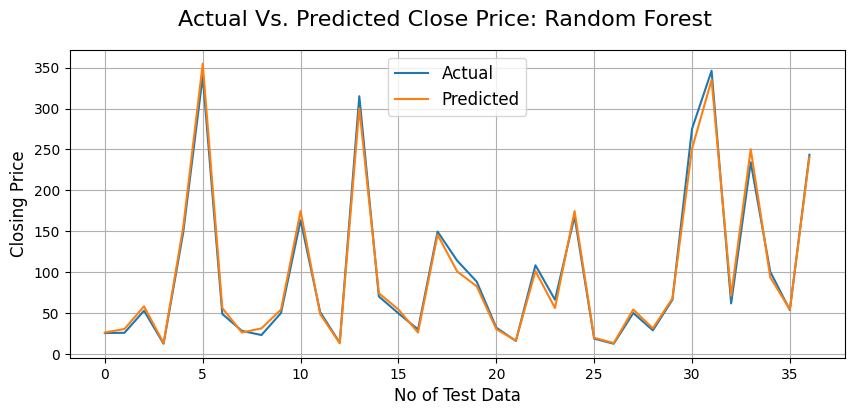

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(pred_Randomforest))
plt.suptitle('Actual Vs. Predicted Close Price: Random Forest', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Evaluation Summary**

In [ ]:
def compare_model(x_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(x_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(x_test)
    #getting accuracy score for each model
    accuracy = model.score(x_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2
  
    
    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df

In [ ]:
model = [Lin_reg, Lasso_reg, Ridge_reg, Elasticnet,dec_tree,rf_model]

In [ ]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(x_train, x_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
5,ElasticNet,0.0835,0.2890,0.2399,0.1519,0.5309
4,Ridge,0.0321,0.1791,0.1522,0.0959,0.8197
3,Lasso,0.0320,0.1789,0.1522,0.0961,0.8202
2,LinearRegression,0.0316,0.1777,0.1513,0.0954,0.8226
1,DecisionTreeRegressor,0.0021,0.0457,0.0338,0.0207,0.9883
0,RandomForestRegressor,0.0014,0.0371,0.0279,0.0174,0.9923


* In EDA part we observed that
1. There is increase in trend of Yes Bank's stock's Close,Open,High,Low price till 2018 an then sudden decrease.
2. We observed that open vs close price graph concluded that after 2018 yes bank's stock hitted drastically.
3. We saw Linear relation between the dependent and independent values.
4. There was alot of multicollinearity present in data. 

*  Target variable(dependent variable) strongly dependent on independent variables
*  We get maximum accuracy of 99%
*  Linear regression and Ridge regression get almost same R squared value
*  Whereas Lasso model shows lowest R squared value and high MSE,RMSE,MAE,MAPE
* 	Ridge regression shrunk the parameters to reduce complexity and multicollinearity but ended up affecting the evaluation metrics.
*  Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
* Random Forest  end up giving the highest R squared value. The predicted values are nearly equal to the actual values. We got 99% accuracy.
* Linear regression , Lasso regression and Ridge regression  showed nearly equal accuracy.

> ### ***Hurrah! We have successfully completed Our Regression Capstone Project !!!***

# **Thank You**

***Kindly ignore the grammatical and spelling errors, if any. Apologies for the inconvenience caused.***